# Passo 1:

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from operator import attrgetter

In [ ]:
#Carregando os dados e depois atualizando
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts']
)

visits.info(memory_usage='deep')
visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


#### Comentário da aluna:
Os dados vieram com 3 colunas com tipos errados, a coluna 'Device' estava como 'objeto', mas trata-se de somente duas opções de device, 'touch' ou 'desktop',então passamos ela para o tipo 'category'.
Já as colunas 'Start Ts' e 'End Ts' não estavam com o tipo adequeado, o de tempo, então convertemos para datetime.
Além de termos diminuido sigificamente o 'memory usage'(memória usada).

In [ ]:
#Carregando os dados e depois atualizando
orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
     parse_dates= ['Buy Ts']
)
orders.info(memory_usage='deep')
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


#### Comentário da aluna:
Na tabela 'orders', havia somente uma coluna com o tipo de dado incorreto, a 'Buy Ts' que mostra a data e hora da do pedido. Convertemos ela para datetime o que dimiuniu o uso do 'memory usage' (memória usada).

In [ ]:
#Carregando os dados e depois atualizando
costs= pd.read_csv(
    '/datasets/costs_us.csv',
    parse_dates=['dt']
)
costs.info(memory_usage='deep')
costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


#### Comentário da aluna:
Nesta tabela, somente a coluna 'dt', que mostra a data, não estava como datetime e então convertemos ela.

In [5]:
#Procurando valores atípicos na tabela visits
visits_dupli = visits.duplicated().sum()
print('Número de valores duplicados:', visits_dupli)
visits_null = visits.isna().sum()
print('Número de valores nulos:\n', visits_null)

Número de valores duplicados: 0
Número de valores nulos:
 Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


In [6]:
#Procurando valores atípicos na tabela orders
orders_dupli = orders.duplicated().sum()
print('Número de valores duplicados:', orders_dupli)
orders_null = orders.isna().sum()
print('Número de valores nulos:\n', orders_null)


Número de valores duplicados: 0
Número de valores nulos:
 Buy Ts     0
Revenue    0
Uid        0
dtype: int64


In [7]:
#Procurando valores atípicos na tabela costs
costs_dupli = visits.duplicated().sum()
print('Número de valores duplicados:', costs_dupli)
costs_null = visits.isna().sum()
print('Número de valores nulos:\n', costs_null)

Número de valores duplicados: 0
Número de valores nulos:
 Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


# Passo 2:

### 1. Produto:

In [8]:
#Fazendo funis
#Por dia
uid_day = (
    visits.groupby(visits['Start Ts'].dt.date)['Uid']
    .nunique()
    .reset_index(name='uid_day')
)

#Por semana
uid_week = (
    visits.groupby(visits['Start Ts'].dt.to_period("W"))['Uid']
    .nunique()
    .reset_index(name='uid_week')
)

#Por mês
uid_month = (
    visits.groupby(visits['Start Ts'].dt.to_period("M"))['Uid']
    .nunique()
    .reset_index(name='uid_month')
)

print ('Quantidade de pessoas que usam o produto cada dia:\n', uid_day.sum())
print ('Quantidade de pessoas que usam o produto cada semana:\n', uid_week.sum())
print ('Quantidade de pessoas que usam o produto cada mês:\n', uid_month.sum())

Quantidade de pessoas que usam o produto cada dia:
 uid_day    330509
dtype: int64
Quantidade de pessoas que usam o produto cada semana:
 uid_week    302961
dtype: int64
Quantidade de pessoas que usam o produto cada mês:
 uid_month    278741
dtype: int64


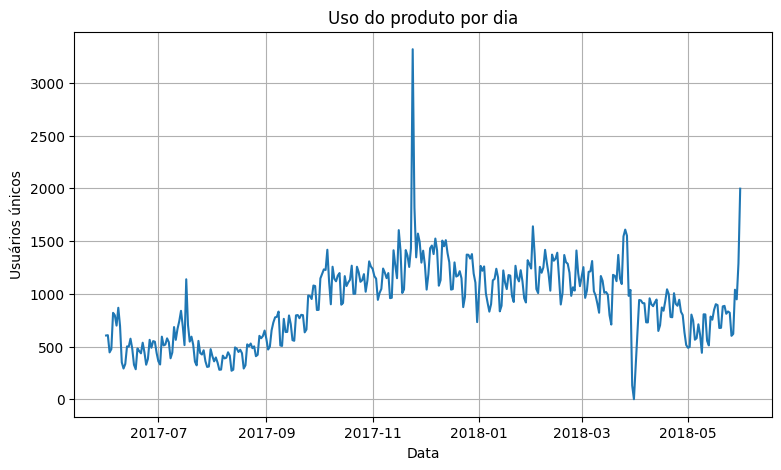

In [9]:
#Gráfico por dia
plt.figure(figsize=(9,5))
plt.plot(uid_day['Start Ts'], uid_day['uid_day'], label='Por dia')
plt.xlabel('Data')
plt.ylabel('Usuários únicos')
plt.title('Uso do produto por dia')
plt.grid(True)
plt.show()

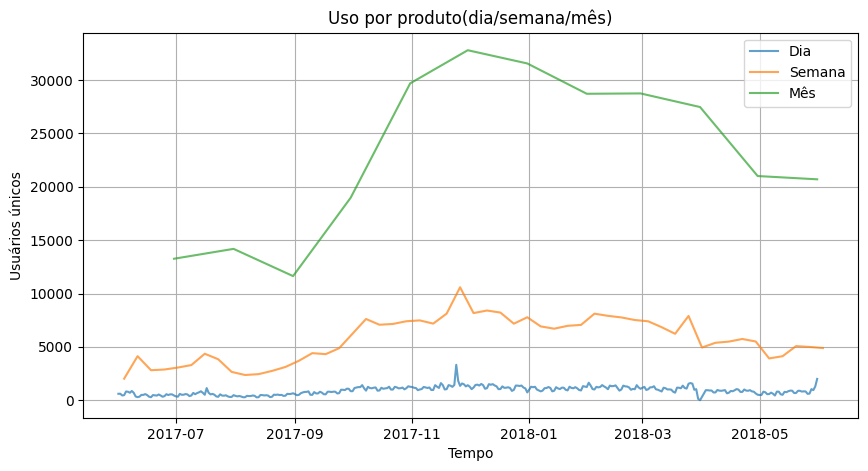

In [10]:
#Gráfico comparativo por dia, semana e mês
plt.figure(figsize=(10,5))
plt.plot(uid_day['Start Ts'], uid_day['uid_day'], label='Dia', alpha=0.7)
plt.plot(uid_week['Start Ts'], uid_week['uid_week'], label='Semana', alpha=0.7)
plt.plot(uid_month['Start Ts'],uid_month['uid_month'],label='Mês', alpha=0.7)

plt.xlabel('Tempo')
plt.ylabel('Usuários únicos')
plt.title('Uso por produto(dia/semana/mês)')
plt.legend()
plt.grid(True)
plt.show()

#### Comentário da aluna:
Pelo gráfico acima, podemos perceber que o uso diário não sofre grande mudança em relação ao tempo, mas varia muito.
Já o uso semanal, teve seu pico em 2017-11, e depois diminuiu. E por fim, o uso mensal que começa sem grande mudança, mas tem um grande uso entre 2017-11 e 2018-01, talvez por causa da época festiva? 

In [11]:
#Calculando sessões por dia
session_day = (
    visits.groupby(visits['Start Ts'].dt.date)['Uid']
    .count()
    .reset_index(name='session')
)

print(f'Ocorrem as seguintes sessões por dia:\n', session_day)

Ocorrem as seguintes sessões por dia:
        Start Ts  session
0    2017-06-01      664
1    2017-06-02      658
2    2017-06-03      477
3    2017-06-04      510
4    2017-06-05      893
..          ...      ...
359  2018-05-27      672
360  2018-05-28     1156
361  2018-05-29     1035
362  2018-05-30     1410
363  2018-05-31     2256

[364 rows x 2 columns]


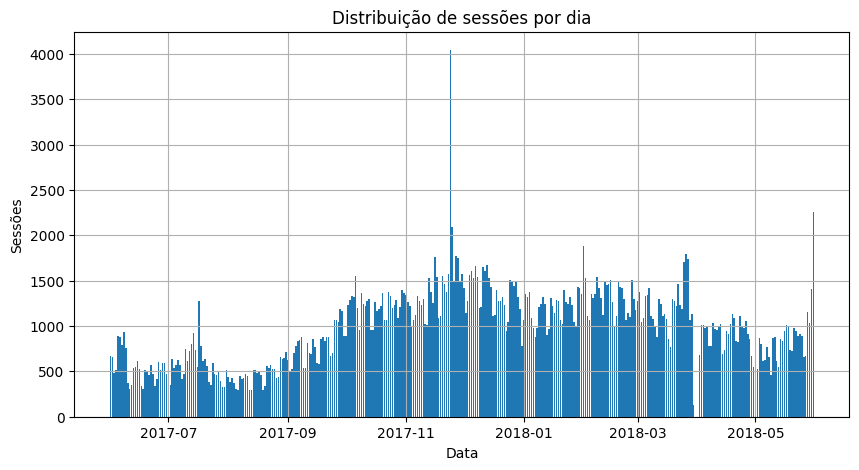

In [12]:
#Criando gráfico
plt.figure(figsize=(10,5))
plt.bar(session_day['Start Ts'], session_day['session'])
plt.xlabel('Data')
plt.ylabel('Sessões')
plt.title('Distribuição de sessões por dia')
plt.grid(True)
plt.show()

#### Comentário da aluna:
Existe um pico de sessões entre 2017-11 e 2018-01.

In [13]:
#Calculando o comprimento de cada sessão
visits['session_lenght'] = visits['End Ts'] - visits['Start Ts']
print('Comprimento de cada sessão\n',visits['session_lenght'] )

Comprimento de cada sessão
 0        0 days 00:18:00
1        0 days 00:28:00
2        0 days 00:00:00
3        0 days 00:24:00
4        0 days 00:00:00
               ...      
359395   0 days 00:00:19
359396   0 days 00:00:19
359397   0 days 00:00:19
359398   0 days 00:00:19
359399   0 days 00:00:19
Name: session_lenght, Length: 359400, dtype: timedelta64[ns]


In [14]:
#Calculando a frequência

# Ordenar por usuário e data da sessão
visits = visits.sort_values(["Uid", "Start Ts"])

# Calcular tempo até a próxima sessão de cada usuário
visits["next_session"] = visits.groupby("Uid")["Start Ts"].shift(-1)
visits["time_between_sessions"] = visits["next_session"] - visits["Start Ts"]

print('Os usuários voltam com uma frequência de:\n',visits["time_between_sessions"])


Os usuários voltam com uma frequência de:
 196543                 NaT
257333                 NaT
173818                 NaT
173142   152 days 16:28:00
192554    21 days 02:06:00
                ...       
175259                 NaT
293449                 NaT
319162   144 days 20:03:00
222173                 NaT
132805                 NaT
Name: time_between_sessions, Length: 359400, dtype: timedelta64[ns]


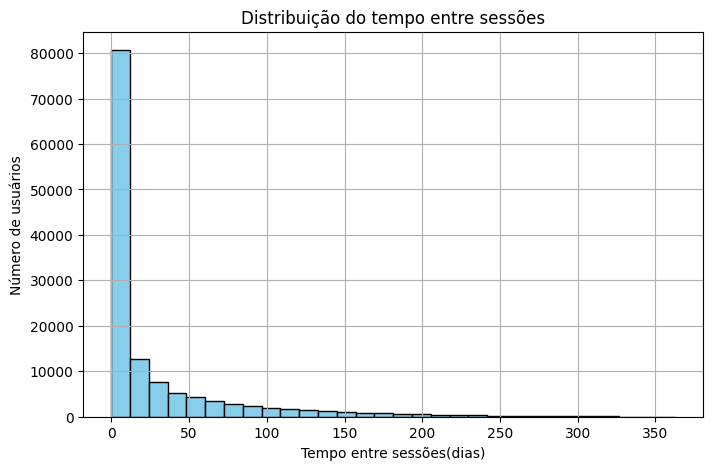

In [15]:
#Gráfico sobre o tempo entre sessões
#Converter para dias
freq_days = visits["time_between_sessions"].dt.total_seconds() / (60*60*24)

plt.figure(figsize=(8,5))
plt.hist(freq_days, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tempo entre sessões(dias)')
plt.ylabel('Número de usuários')
plt.title('Distribuição do tempo entre sessões')
plt.grid(True)
plt.show()

#### Comentário da aluna:
Pelo gráfico, observamos que o maior tempo que um usuários já levou entre as sessões foi de 175 dias e o menor foi no mesmo dia. A média de usuários é 1. Além disso, nenhum usuários levou entre 50 a 100 dias entre as sessões.

### 1. Vendas:

In [16]:
#Quando as pessoas começaram a comprar
#Fazendo cortes da primeira visita e renomeando
first_visits = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.rename(columns={'Start Ts': 'registration_ts'}, inplace=True)
#Fazendo cortes da primeira compra e renomeando
first_orders = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.rename(columns={'Buy Ts': 'purchase_ts'}, inplace=True)

#Unir os dados
user_journey = first_visits.merge(first_orders, on= 'Uid', how='left')

#Dias até a primeira compra
user_journey['days_to_purchase'] = (
    (user_journey['registration_ts'] - user_journey['purchase_ts']).dt.days
)

first_source = visits.sort_values('Start Ts').groupby('Uid').first().reset_index()
user_journey = user_journey.merge(first_source[['Uid', 'Source Id']], on='Uid', how='left')

#Fazendo uma função
# Converter dias em categorias
def conversion(days):
    if pd.isna(days):
        return 'No Purchase'
    elif days == 0:
        return '0d'
    elif days == 1:
        return '1d'
    elif days <= 3:
        return '2-3d'
    elif days <= 7:
        return '4-7d'
    else:
        return '8d+'

user_journey['conversion'] = user_journey['days_to_purchase'].apply(conversion)
print(user_journey['conversion'].sample(10))

79291     No Purchase
112692    No Purchase
194418           2-3d
87295     No Purchase
36856     No Purchase
28787     No Purchase
194359           2-3d
113916           2-3d
225384    No Purchase
204620    No Purchase
Name: conversion, dtype: object


In [17]:
#Quantos pedidos os clientes fazem durante um determinado período
#Determinando período
start= '2017-01-01 08:00:00'
end = '2017-06-01 23:00:00'

#Filtrando os dados
orders_period = orders[(orders['Buy Ts'] >= start) & (orders['Buy Ts'] <= end)]

#Contando os pedido
orders_count = orders_period.groupby('Uid').size().reset_index(name='num_orders')
print(orders_count)

                     Uid  num_orders
0     585738041899923335           1
1    1074355127080856382           1
2    1186685127129229501           1
3    1292867924428534308           1
4    1306739390297736782           1
..                   ...         ...
81  17950587498543383909           1
82  18124631666135248287           1
83  18284967083997117828           1
84  18335282082749800806           1
85  18346008462625591446           1

[86 rows x 2 columns]


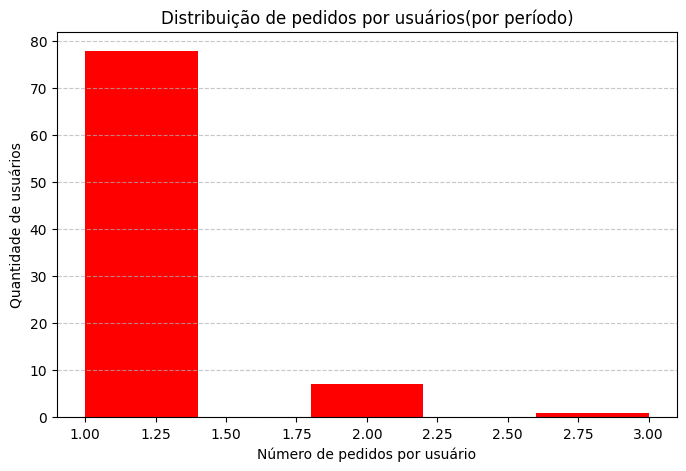

In [18]:
#Criando gráfico
plt.figure(figsize=(8,5))
plt.hist(orders_count['num_orders'], bins=5,color='red')
plt.xlabel('Número de pedidos por usuário')
plt.ylabel('Quantidade de usuários')
plt.title('Distribuição de pedidos por usuários(por período)')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Cometário da aluna:
Vemos no gráfico que quase 80 usuários fazem em torno de 1 a 1,25 pedidos, mas menos de 10 usários fazem mais do que um pedido e quase 0 fazem mais de 3 pedidos.

In [19]:
#Qual o volume médio de uma compra
#Calculando a média das compras
avg_order = orders['Revenue'].mean()
print('Volume médio geral:', avg_order)

#Calculando as médias das compras por usuário
avg_order_user = orders.groupby('Uid')['Revenue'].mean().reset_index(name='arg_order_value')
print ('Volume médio de compras por usuário:\n', avg_order_user.head())

Volume médio geral: 4.999646930477041
Volume médio de compras por usuário:
                 Uid  arg_order_value
0   313578113262317            0.550
1  1575281904278712            1.525
2  2429014661409475           73.330
3  2464366381792757            2.440
4  2551852515556206            5.495


In [20]:
#Quanto dinheiro eles trazem para empresa(LTV)

#margin_rate = 0.5
#Fazendo um corte por mês de registro
#visits['cohort'] = visits['Start Ts'].astype('datetime64[M]') 

#Calculando e agrupando receita por usuário
#user_revenue = orders.groupby('Uid')['Revenue'].sum().reset_index()

#Calculando e agrupando receita com a data de aquisição
#user_first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
#user_first_visit.rename(columns={'Start Ts': 'registration_ts'}, inplace=True)
#user_first_visit['cohort'] = user_first_visit['registration_ts'].astype('datetime64[M]') 

#user_data = user_revenue.merge(user_first_visit, on='Uid', how='left')
#user_data['cohort'] = user_data['registration_ts'].astype('datetime64[M]')

#Calculando a receita
#orders_reg = orders.merge(user_first_visit, on='Uid', how='left')
#orders_reg['days_from_reg'] = (
 #   (orders_reg['Buy Ts'] - orders_reg['registration_ts']) / np.timedelta64(1,'D')
#)
#orders_reg['days_from_reg'] = orders_reg['days_from_reg'].fillna(-1).astype(int)

#ltv = orders_reg.groupby(['cohort','days_from_reg'])['Revenue'].sum().groupby(level=0).cumsum().reset_index()
#ltv['LTV'] = ltv['Revenue'] - margin_rate
#print('Quantidade de dinheiro que os clientes trazem para empresa:\n',ltv['LTV'])

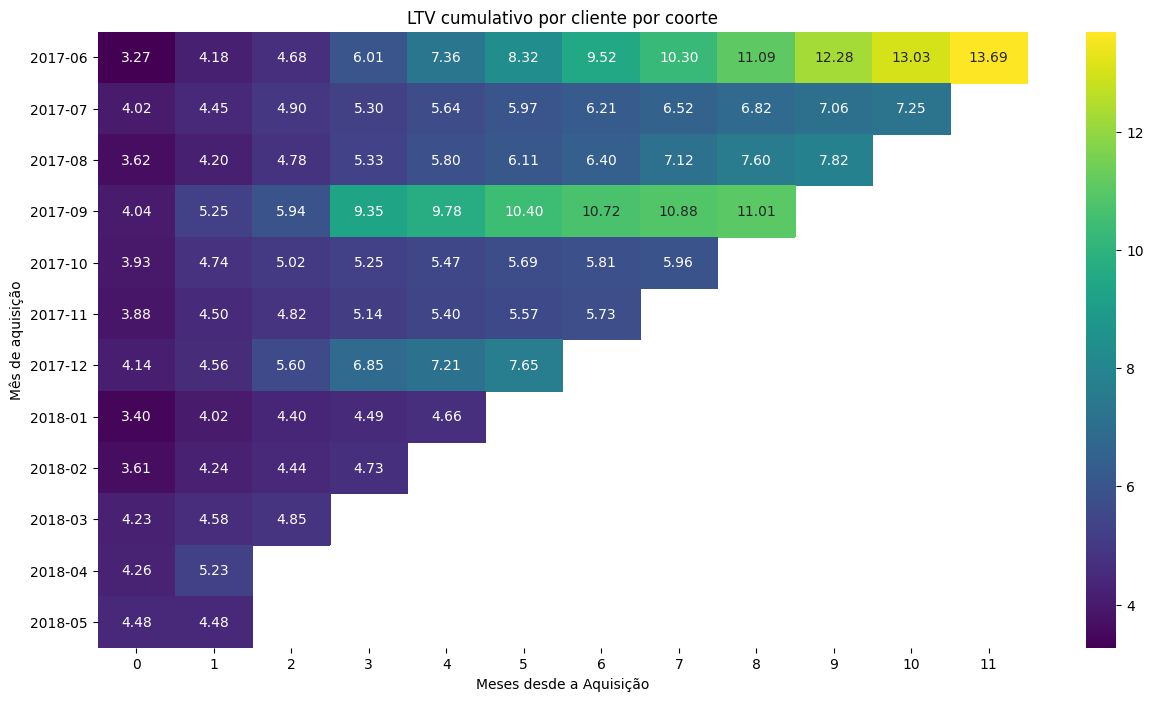

In [21]:
# Definir o mês de aquisição de cada usuário (Coorte) 
visits['acquisition_month'] = visits['Start Ts'].dt.to_period('M')
first_session = visits.groupby('Uid')['acquisition_month'].min().reset_index()

#Juntar a coorte de aquisição com os dados dos pedidos
orders_with_cohort = pd.merge(orders, first_session, on='Uid')

#Calcular o mês do pedido
orders_with_cohort['order_month'] = orders_with_cohort['Buy Ts'].dt.to_period('M')

#Calcular a idade da coorte de cada pedido
orders_with_cohort['cohort_age'] = (orders_with_cohort['order_month'] - orders_with_cohort['acquisition_month']).apply(attrgetter('n'))

#Calcular receita por coorte e idade
cohort_revenue = orders_with_cohort.groupby(['acquisition_month', 'cohort_age'])['Revenue'].sum().reset_index()

#Tamanho de cada coorte
cohort_size = orders_with_cohort.groupby('acquisition_month')['Uid'].nunique().reset_index()
cohort_size.rename(columns={'Uid': 'n_buyers'}, inplace=True)

#Juntar dados e calcualar o LTV
report = pd.merge(cohort_size, cohort_revenue, on='acquisition_month')
report['ltv'] = report['Revenue'] / report ['n_buyers']

#Criar tabela pivot table
ltv_pivot = report.pivot_table(
    index='acquisition_month',
    columns='cohort_age',
    values='ltv',
    aggfunc='mean'
)

#LTV cumulativo
cumulative_ltv= ltv_pivot.cumsum(axis=1)

#Fazendo um heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cumulative_ltv, annot=True, fmt='.2f', cmap='viridis')
plt.title('LTV cumulativo por cliente por coorte')
plt.xlabel('Meses desde a Aquisição')
plt.ylabel('Mês de aquisição')
plt.show()

#### Comentário da aluna:
É um bom sinal termos somentes valores positivos, já que os negativos indicam prejuízo. 

### 3. Marketing:

In [22]:
#Quanto dinheiro foi gasto
#Calculando gastos totais
total_costs = costs['costs'].sum()
print('\033[1mGasto total:\033[0m \n', total_costs)

#Calculando gastos por origem
costs_source = costs.groupby('source_id')['costs'].sum().reset_index()
print('\033[1mGastos por anúncio:\033[0m\n', costs_source)

#Calculando gastos ao longo do tempo
#Por dia
costs_day= costs.groupby('dt')['costs'].sum().reset_index()
print('\033[1mGasto por dia:\033[0m\n',costs_day.head())

#Por mês
costs['month'] = costs['dt'].astype('datetime64[M]')
costs_month = costs.groupby('month')['costs'].sum().reset_index()
print('\033[1mGasto por mês:\033[0m\n',costs_month.head())

#Por ano
costs['year'] = costs['dt'].astype('datetime64[Y]')
costs_year = costs.groupby('year')['costs'].sum().reset_index()
print('\033[1mGasto por ano:\033[0m\n',costs_year.head())

Gasto total: 
 329131.62
Gastos por anúncio:
    source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49
Gasto por dia:
           dt   costs
0 2017-06-01  735.26
1 2017-06-02  721.19
2 2017-06-03  450.85
3 2017-06-04  761.16
4 2017-06-05  821.44
Gasto por mês:
        month     costs
0 2017-06-01  18015.00
1 2017-07-01  18240.59
2 2017-08-01  14790.54
3 2017-09-01  24368.91
4 2017-10-01  36322.88
Gasto por ano:
         year      costs
0 2017-01-01  187961.15
1 2018-01-01  141170.47


<function matplotlib.pyplot.show(close=None, block=None)>

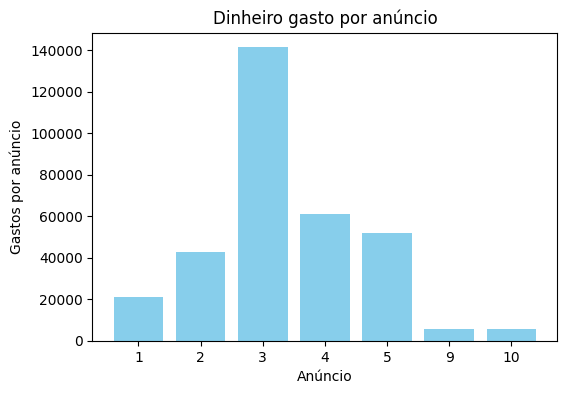

In [23]:
#Gráfico do gasto por origem
plt.figure(figsize=(6,4))
plt.bar(costs_source['source_id'].astype(str),costs_source['costs'], color='skyblue')
plt.xlabel('Anúncio')
plt.ylabel('Gastos por anúncio')
plt.title('Dinheiro gasto por anúncio')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

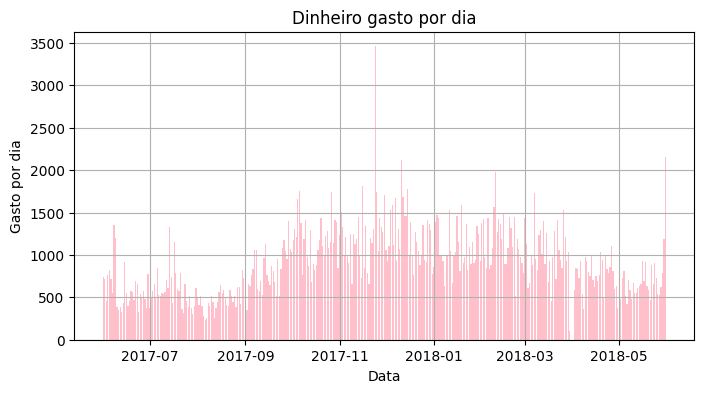

In [24]:
#Gráfico do gasto por dia
plt.figure(figsize=(8,4))
plt.bar(costs_day['dt'],costs_day['costs'], color='pink')
plt.xlabel('Data')
plt.ylabel('Gasto por dia')
plt.title('Dinheiro gasto por dia')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

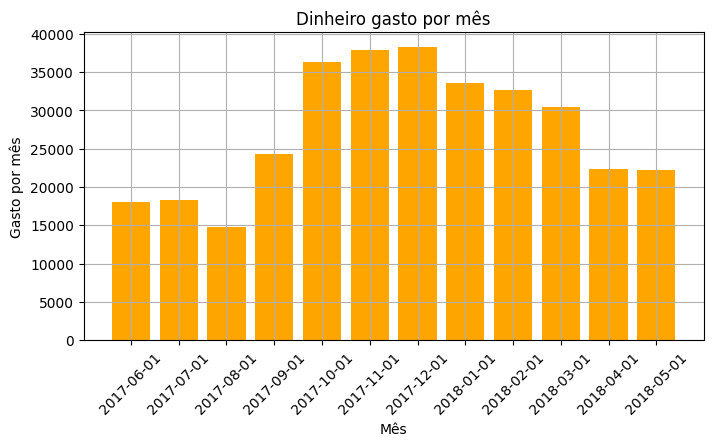

In [25]:
#Gráfico do gasto por mês
plt.figure(figsize=(8,4))
plt.bar(costs_month['month'].astype(str),costs_month['costs'],color='orange')
plt.xlabel('Mês')
plt.ylabel('Gasto por mês')
plt.title('Dinheiro gasto por mês')
plt.grid(True)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

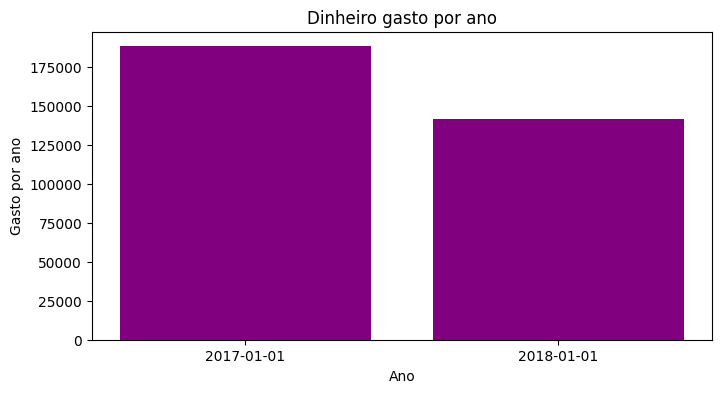

In [26]:
#Gráfico do gasto por ano
plt.figure(figsize=(8,4))
plt.bar(costs_year['year'].astype(str),costs_year['costs'],color='purple')
plt.xlabel('Ano')
plt.ylabel('Gasto por ano')
plt.title('Dinheiro gasto por ano')
plt.show

In [27]:
#Quanto custou a aquisição de clientes

#Primeira visita
user_source = visits.sort_values('Start Ts').groupby('Uid').first().reset_index()

#Contar os clientes por cada canal
user_channel = user_source.groupby('Source Id')['Uid'].nunique().reset_index(name='num_clients')

#Custos por canal
costs_channel = costs.groupby('source_id')['costs'].sum().reset_index()
costs_channel.rename(columns={'source_id': 'Source Id'}, inplace=True)

#Calculando o CAC por canal
cac_channel = costs_channel.merge(user_channel, on='Source Id', how='left')
cac_channel['CAC']= cac_channel['costs'] / cac_channel['num_clients']

print('Custo médio de aquisição por cliente:\n',cac_channel['CAC'].round(2))

Custo médio de aquisição por cliente:
 0    2.20
1    2.43
2    2.14
3    0.84
4    1.05
5    0.86
6    0.84
Name: CAC, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

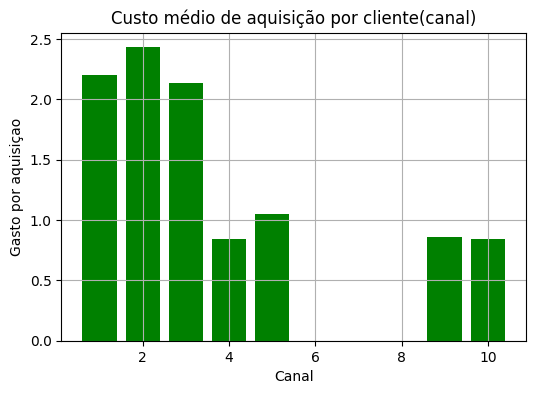

In [28]:
#Gráfico do custo médio de aquisição por cliente
plt.figure(figsize=(6,4))
plt.bar(cac_channel['Source Id'],cac_channel['CAC'], color='green',linewidth=3)
plt.xlabel('Canal')
plt.ylabel('Gasto por aquisiçao')
plt.title('Custo médio de aquisição por cliente(canal)')
plt.grid(True)
plt.show

In [34]:
#Os ivestimentos valeram a pena
total_revenue = orders['Revenue'].sum()
roi_total = (total_revenue - total_costs) / total_costs
print('ROI total:\n', roi_total.round(2))

ROI total:
 -0.23


In [36]:
# Mantém apenas uma visita por usuário
visits_unique = visits.sort_values('Start Ts').drop_duplicates(subset='Uid', keep='first')

orders_channel = orders.merge(visits_unique[['Uid','Source Id']], on='Uid', how='left')

# Receita por canal
revenue_channel = orders_channel.groupby('Source Id', as_index=False)['Revenue'].sum()
revenue_channel.rename(columns={'Source Id':'source_id'}, inplace=True)

# Custos por canal
costs_channel = costs.groupby('source_id', as_index=False)['costs'].sum()

# ROI
roi_channel = revenue_channel.merge(costs_channel, on='source_id', how='left')
roi_channel['ROI'] = (roi_channel['Revenue'] - roi_channel['costs']) / roi_channel['costs']
roi_channel['ROI'] = roi_channel['ROI'].fillna(0)

print('ROI por canal de marketing:\n', roi_channel)


ROI por canal de marketing:
    source_id   Revenue      costs       ROI
0          1  31090.55   20833.27  0.492351
1          2  46923.61   42806.04  0.096191
2          3  54511.24  141321.63 -0.614275
3          4  56696.83   61073.60 -0.071664
4          5  52624.02   51757.10  0.016750
5          7      1.22        NaN  0.000000
6          9   5759.40    5517.49  0.043844
7         10   4450.33    5822.49 -0.235665


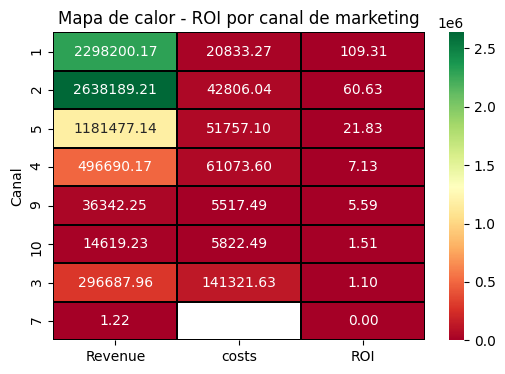

In [31]:
#Criando mapa de calor para ROI por canal de marketing
#roi_pivot = roi_channel.set_index('source_id')[['ROI']]
roi_pivot = roi_channel.sort_values("ROI", ascending=False).set_index("source_id")

plt.figure(figsize=(6,4))
sns.heatmap(
    roi_pivot,
    annot=True,
    cmap="RdYlGn",
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)

plt.title('Mapa de calor - ROI por canal de marketing')
#plt.xlabel ('ROI')
plt.ylabel('Canal')
plt.show()

#### Análise da aluna:
O ROI se manteve positivo em todos os canais, é um bom sinal! Podemos entender qual canal tem um custo menos e uma receita maior e usá-lo mais.

# Passo 3:

### Conclusão:


Neste projeto analisamos as seguintes métricas: CAC, LTV, ROI e Gasto por canal.


Obtemos canais onde o CAC é maior que o LTV, o que é uma relação saudável, mas por outro lado, também temos casos onde o LTV é negativo, ou seja, um prejuizo que não compensa o investimento. Além disso, o nosso ROI foi negativo, então é preciso revisar as estratégias de marketing e os canais. 
Percebemos também que nos meses 10 e 9 foi gasto o maior montante de dinheiro com marketing.
    